In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import re

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
dfmen = pd.read_csv('men_sampled_shoe.csv')
dfwomen = pd.read_csv('women_sampled_shoe.csv')
df = pd.concat([dfmen, dfwomen])

def get_sex_age(string):
    sex_age = re.search('[F,M]\d*', string).group()
    # F=1, M=0
    sex = re.search('[F,M]', sex_age).group()
    sex = 1 if sex=='F' else 0
    age = re.sub('[F,M]', '', sex_age)
    age = 0 if age=='' else int(age)
    return sex, age
df[['sex','age']] = df['name_age'].apply(
    lambda x: get_sex_age(x),
).to_list()
df['vaporfly'] = df['vaporfly'].astype('bool').astype('int')
df.drop(['name_age', 'match_name'], axis=1, inplace=True)
df.to_csv('Marathon_vaporfly.csv', index=False)

# Practice

## Know your data

In [ ]:
# dataset from https://github.com/Mu-Tien/Vaporflys 
# https://researchers.one/article/2020-02-14

init_data = pd.read_csv('Marathon_vaporfly.csv')
init_data

full_name                         marathon  year        date  \
0            LELISA DESISA                  Boston Marathon  2015     4/20/15   
1     YEMANE ADHANE TSEGAY                  Boston Marathon  2015     4/20/15   
2            WILSON CHEBET                  Boston Marathon  2015     4/20/15   
3          BERNARD KIPYEGO                  Boston Marathon  2015     4/20/15   
4             WESLEY KORIR                  Boston Marathon  2015     4/20/15   
...                    ...                              ...   ...         ...   
1685           LYNDY DAVIS  Women's Olympic Trials Marathon  2016  2016-02-13   
1686         AMANDA MARINO  Women's Olympic Trials Marathon  2016  2016-02-13   
1687        CHRISTINE SHAW  Women's Olympic Trials Marathon  2016  2016-02-13   
1688         LAURA HARNISH  Women's Olympic Trials Marathon  2016  2016-02-13   
1689           OBSIE BIRRU  Women's Olympic Trials Marathon  2016  2016-02-13   

         time  time_minutes  vaporfly  sex  age  
0     2:09:17    129.283333         0    0   25  
1     2:09:48    129.800000         0    0   30  
2     2:10:22    130.366667         0    0   29  
3     2:10:47    130.783333         0    0   28  
4     2:10:49    130.816667         0    0   32  
...       ...           ...       ...  ...  ...  
1685  3:10:07    190.116667         0    1    0  
1686  3:11:20    191.333333         0    0    0  
1687  3:12:36    192.600000         0    1    0  
1688  3:13:50    193.833333         0    1    0  
1689  3:14:15    194.250000         0    1    0  

[1690 rows x 9 columns]

In [ ]:
init_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1690 entries, 0 to 1689
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   full_name     1690 non-null   object 
 1   marathon      1690 non-null   object 
 2   year          1690 non-null   int64  
 3   date          1690 non-null   object 
 4   time          1690 non-null   object 
 5   time_minutes  1690 non-null   float64
 6   vaporfly      1690 non-null   int64  
 7   sex           1690 non-null   int64  
 8   age           1690 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 119.0+ KB


## What is 'vaporfly'?

Vaporfly - Nike technology, which helps several athletes win marathons and has also been banned as a "technological doping"

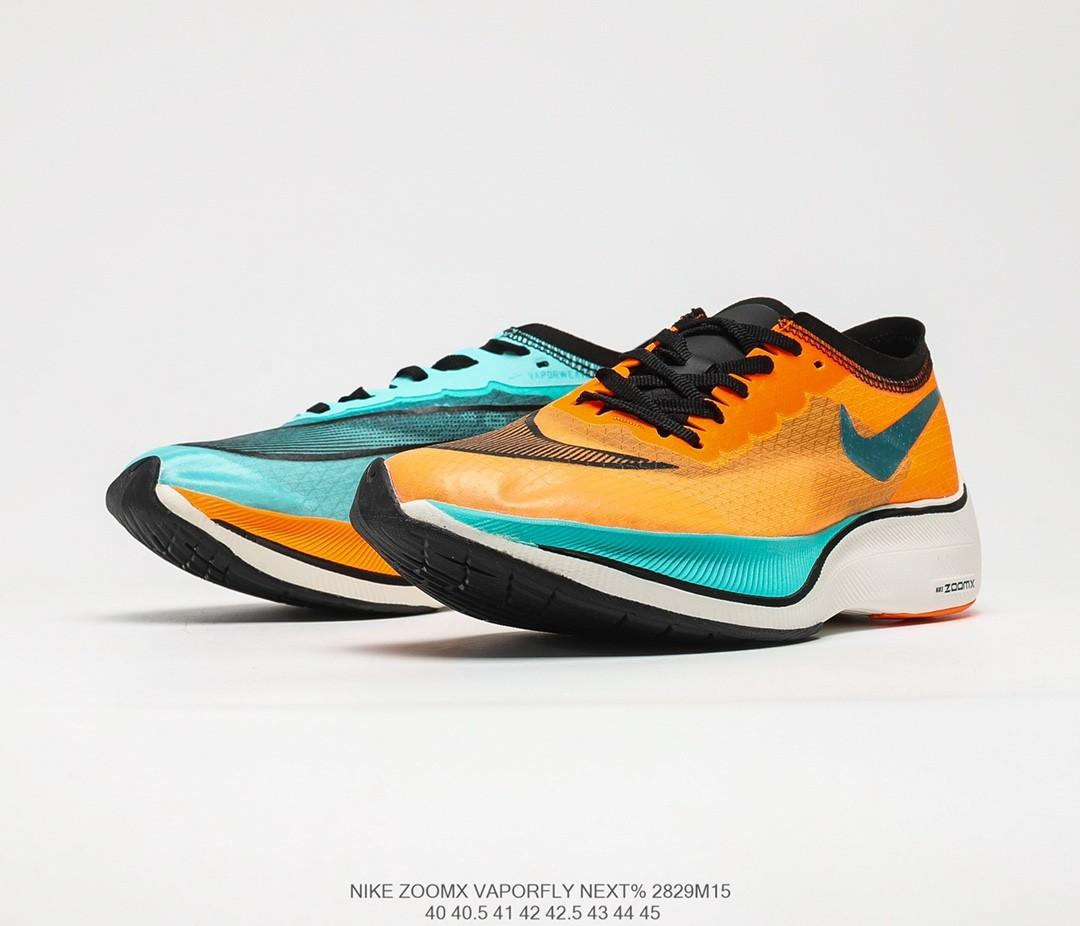

In [ ]:
init_data.describe()

year  time_minutes     vaporfly          sex          age
count  1690.000000   1690.000000  1690.000000  1690.000000  1690.000000
mean   2016.524852    149.959951     0.164497     0.398225    15.107101
std       1.348959     14.666499     0.370836     0.489677    15.508542
min    2015.000000    125.000000     0.000000     0.000000     0.000000
25%    2015.000000    138.583333     0.000000     0.000000     0.000000
50%    2016.000000    147.225000     0.000000     0.000000     0.000000
75%    2018.000000    160.750000     0.000000     1.000000    30.000000
max    2019.000000    239.233333     1.000000     1.000000    62.000000

In [ ]:
#Checking the existence of the null values in the dataset
init_data.isnull().sum(axis=0)

full_name       0
marathon        0
year            0
date            0
time            0
time_minutes    0
vaporfly        0
sex             0
age             0
dtype: int64

![]('')

## Explore & Clean

Let's start with age

In [ ]:
print(f'The oldest person {init_data.age.max()} years old.\nThe youngest person  - {init_data.age.where(lambda x: x > 0).min()}')

The oldest person 62 years old.
The youngest person  - 19.0


In [ ]:
sns.set(rc = {'figure.figsize':(20,10)})

Text(0.5, 1.0, 'Distribution of finishers for Ages')

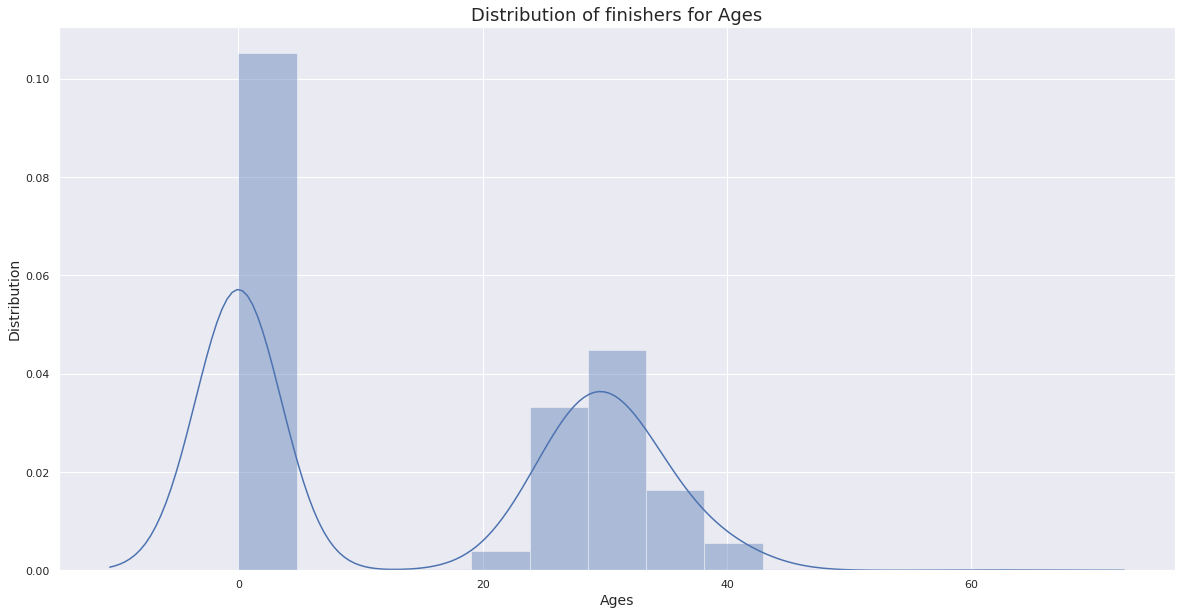

In [ ]:
%%capture --no-display
hage = sns.distplot(init_data.age)
hage.set_xlabel('Ages',fontdict= {'size':14})
hage.set_ylabel(u'Distribution',fontdict= {'size':14})
hage.set_title(u'Distribution of finishers for Ages', fontsize=18)

Change theme

In [ ]:
sns.set_style('whitegrid')

and try another way to find outliers

<AxesSubplot:xlabel='age', ylabel='time_minutes'>

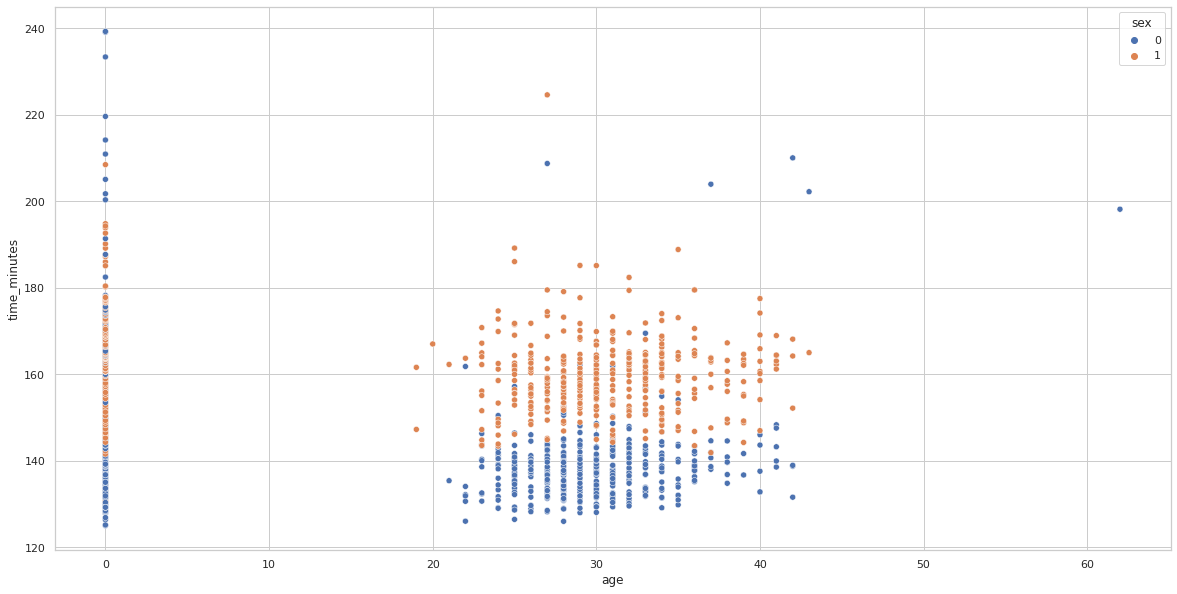

In [ ]:
sns.scatterplot(
    x='age',
    y='time_minutes', 
    hue='sex', # 0=M 1=F
    data=init_data)

Remove 0-age and too old athletes

In [ ]:
data = init_data.copy()
data = data.loc[(data.age>0) & (data.age<62)]

## Continue

Text(0, 0.5, 'Total of People')

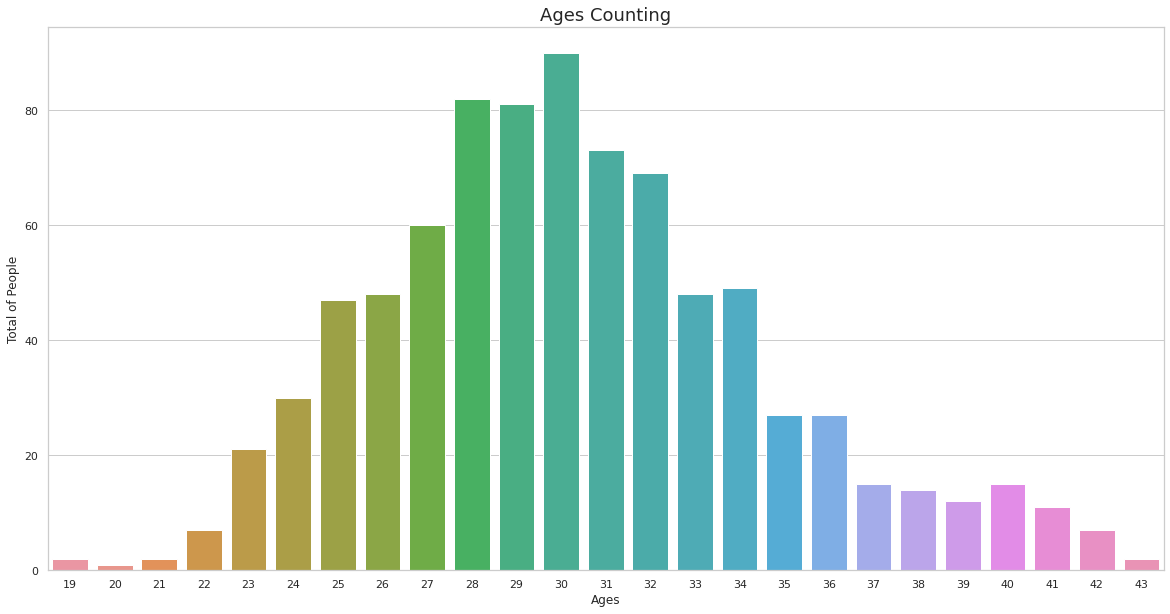

In [ ]:
%%capture --no-display

# Number of Finishers for Age
agecont = sns.countplot(data.age,data=data)
agecont.set_title('Ages Counting', fontsize=18)
agecont.set_xlabel('Ages')
agecont.set_ylabel('Total of People')

Add sex

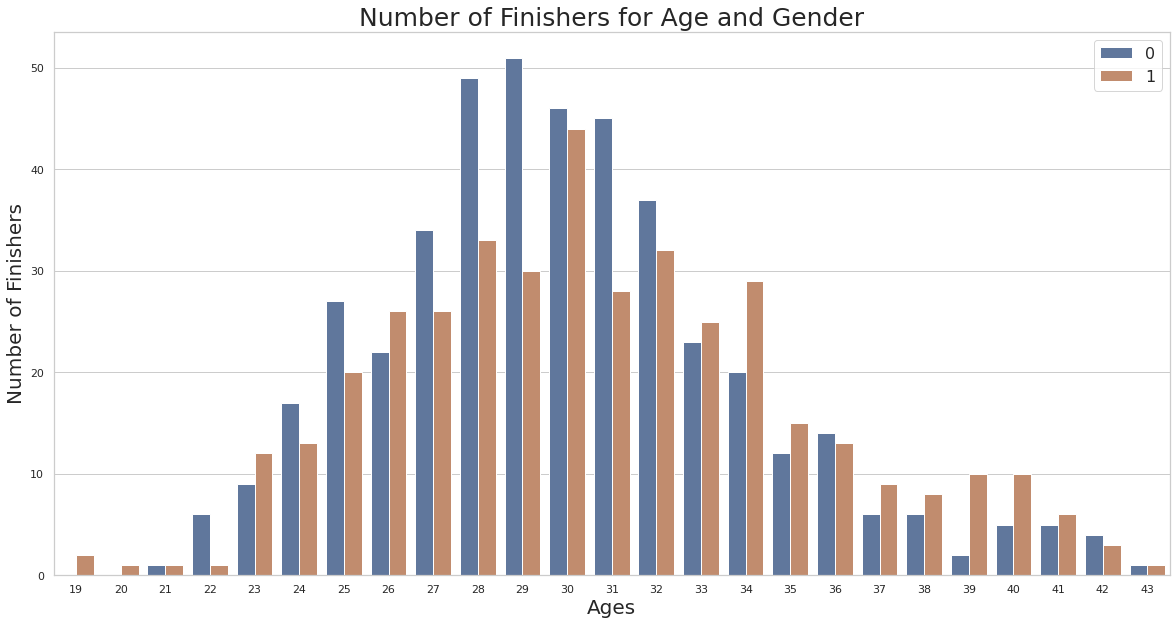

In [ ]:
d = sns.countplot(x='age', hue='sex', data=data, saturation=0.6)
d.set_title('Number of Finishers for Age and Gender', fontsize=25)
d.set_xlabel('Ages',fontdict={'size':20})
d.set_ylabel('Number of Finishers', fontdict={'size':20})
d.legend(fontsize=16)

Text(0.5, 1.0, 'Distribution of finish times per Age group')

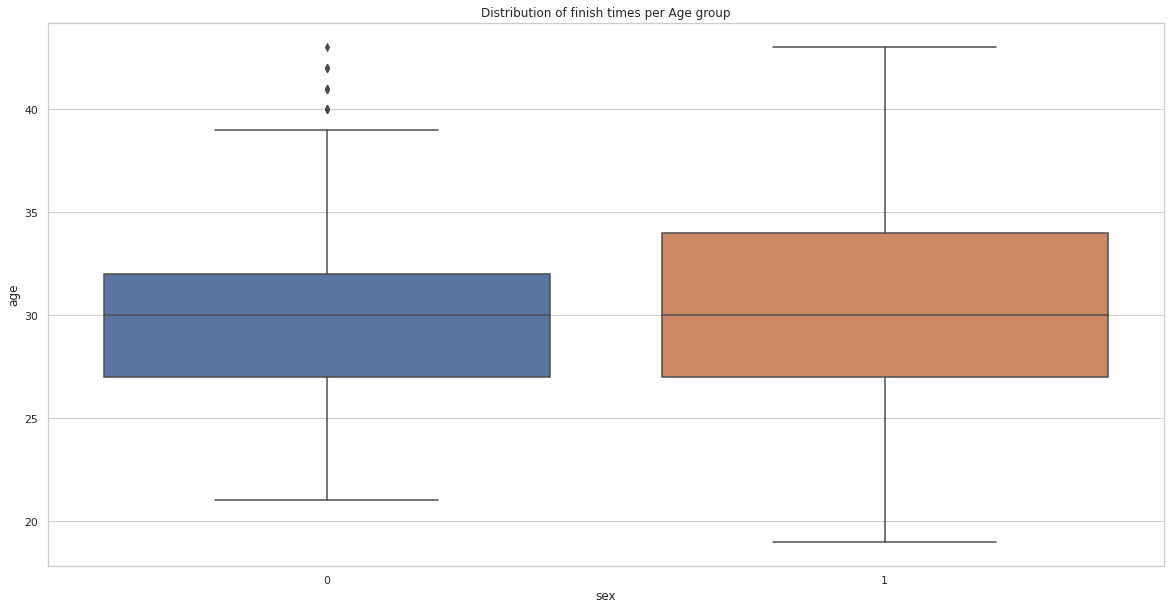

In [ ]:
distribution_per_age = sns.boxplot(x=data['sex'], y=data['age'])
distribution_per_age.set_title("Distribution of finish times per Age group")

Add age groups 

:Bars   [ranges,sex]   (value)
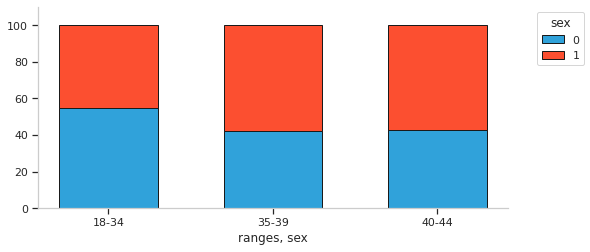

In [ ]:
data_ages = data.copy()
bins = [0, 17, 34, 39, 44, 49, 54, 59, 64]
data_ages['ranges'] = pd.cut(
    data_ages['age'].where(lambda x: x> 0),
    bins,
    labels=["1","18-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64"])
data_ages_2 = pd.crosstab(data_ages.ranges,data_ages['sex']).apply(lambda r: (r/r.sum()) * 100 , axis=1)
data_ages_2.plot(kind = "bar", stacked = True, fontsize=12, position=0.5)

**Vaporfly**

Let's check correlation between age and gender and the use of vaporfly shoes

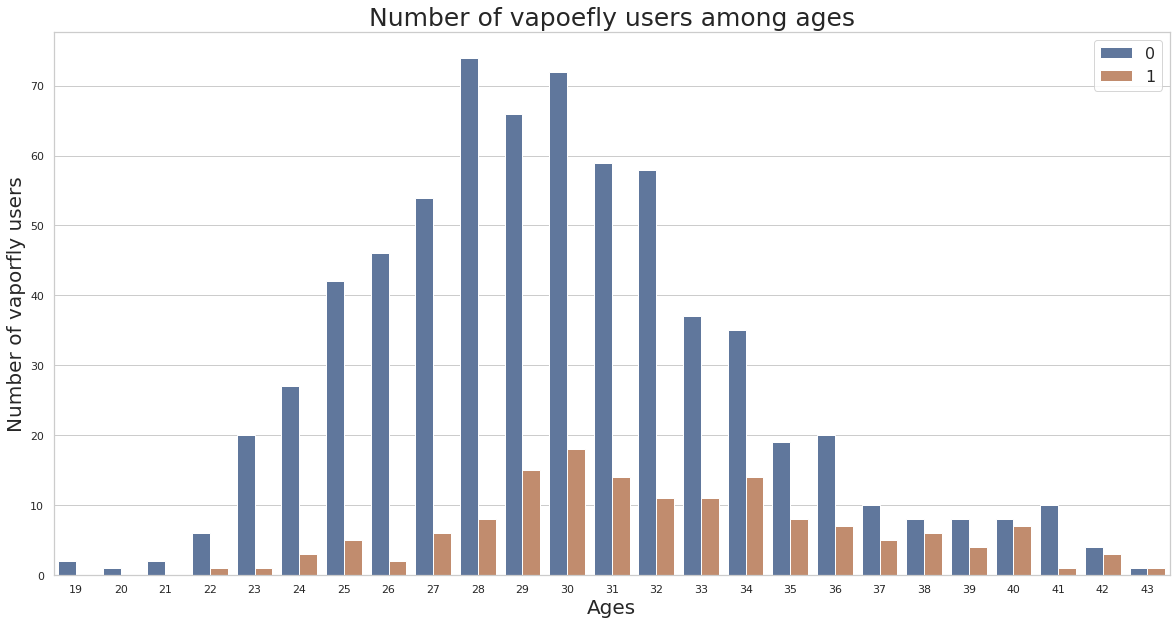

In [ ]:
d = sns.countplot(x='age', hue='vaporfly', data=data, saturation=0.6)
d.set_title('Number of vapoefly users among ages', fontsize=25)
d.set_xlabel('Ages',fontdict={'size':20})
d.set_ylabel('Number of vaporfly users', fontdict={'size':20})
d.legend(fontsize=16)

Can we add everything in one graph?

<AxesSubplot:xlabel='time_minutes', ylabel='marathon'>

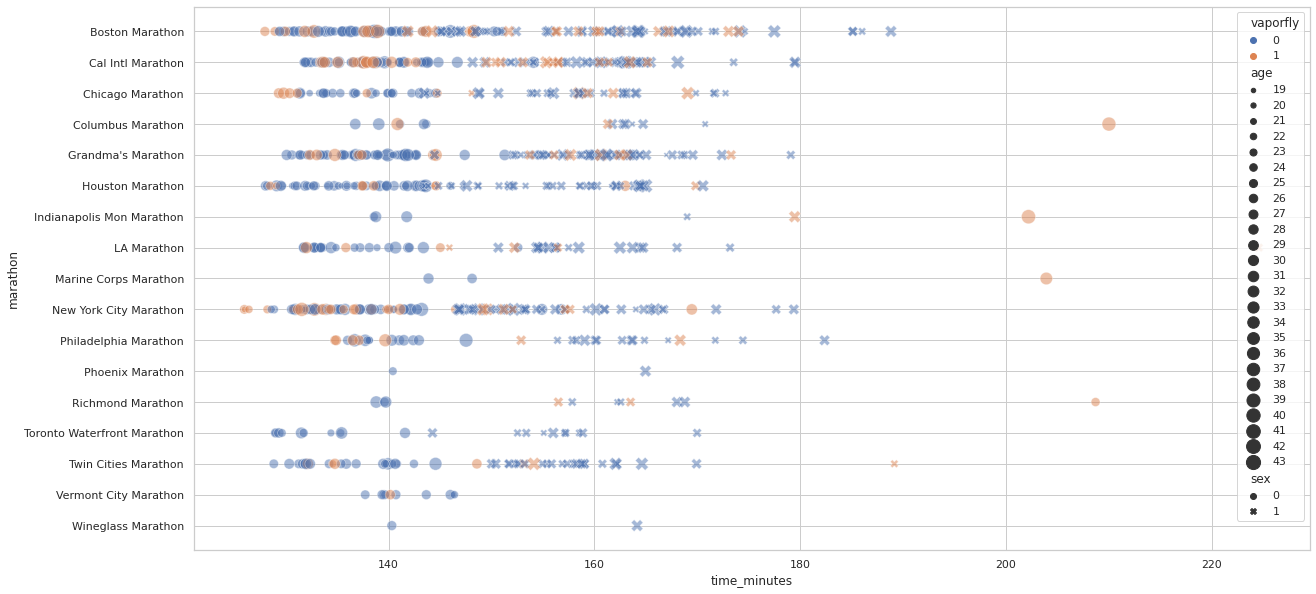

In [ ]:
sns.scatterplot(
    data=data, 
    x='time_minutes', 
    y='marathon', 
    hue='vaporfly', 
    style='sex', 
    size='age',
    sizes=(20, 200), 
    alpha=.5, 
    legend="full"
)

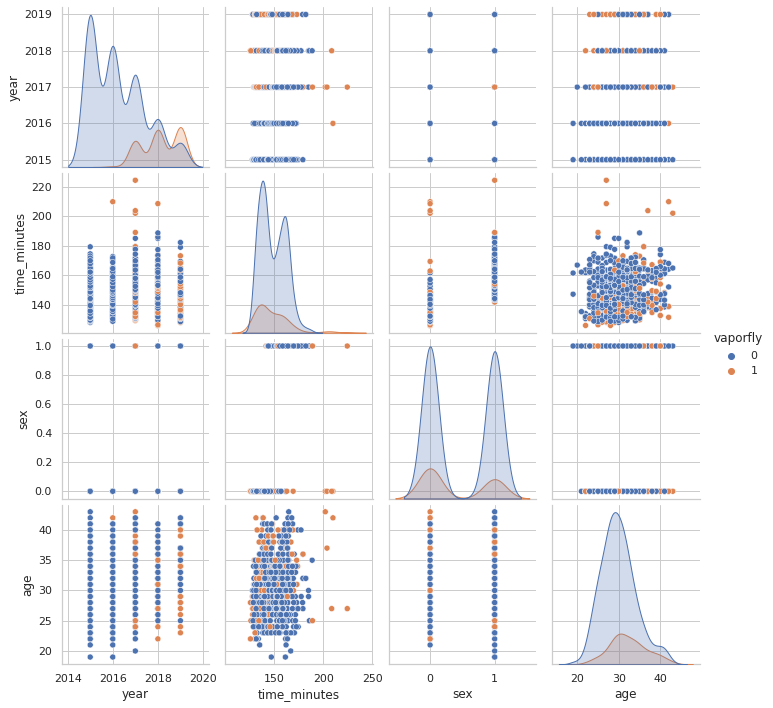

In [ ]:
sns.pairplot(data, hue='vaporfly', kind="scatter")

## One chart - one story

<AxesSubplot:xlabel='year', ylabel='count'>

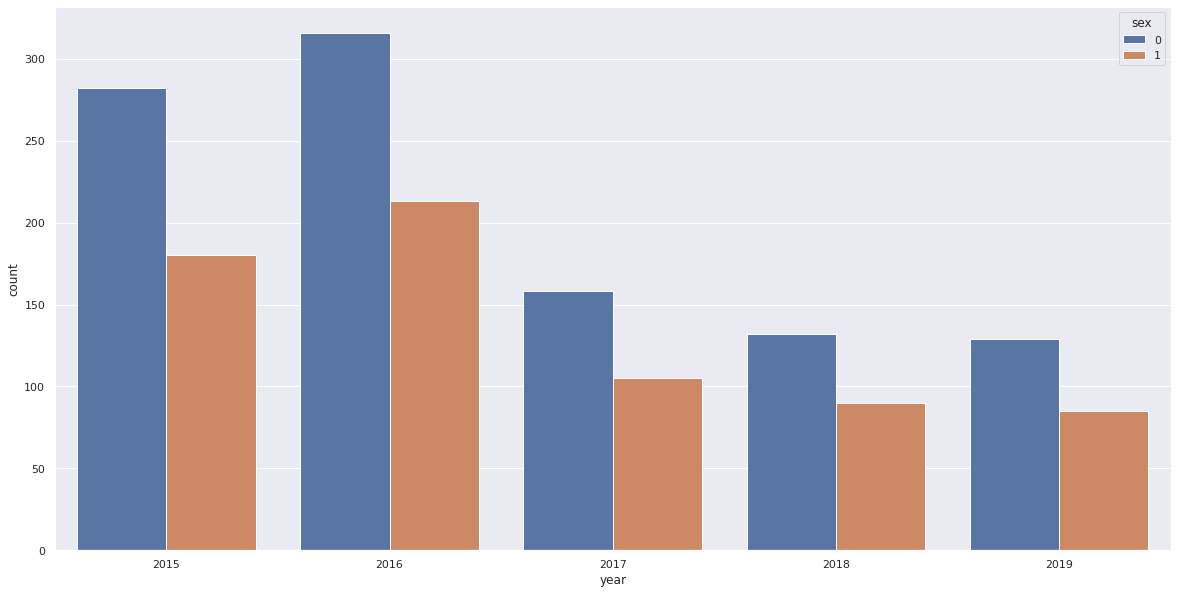

In [ ]:
# Number of participants in marathons
sns.countplot(x='year', hue="sex", data=data)

## Improve

<AxesSubplot:xlabel='year', ylabel='count'>

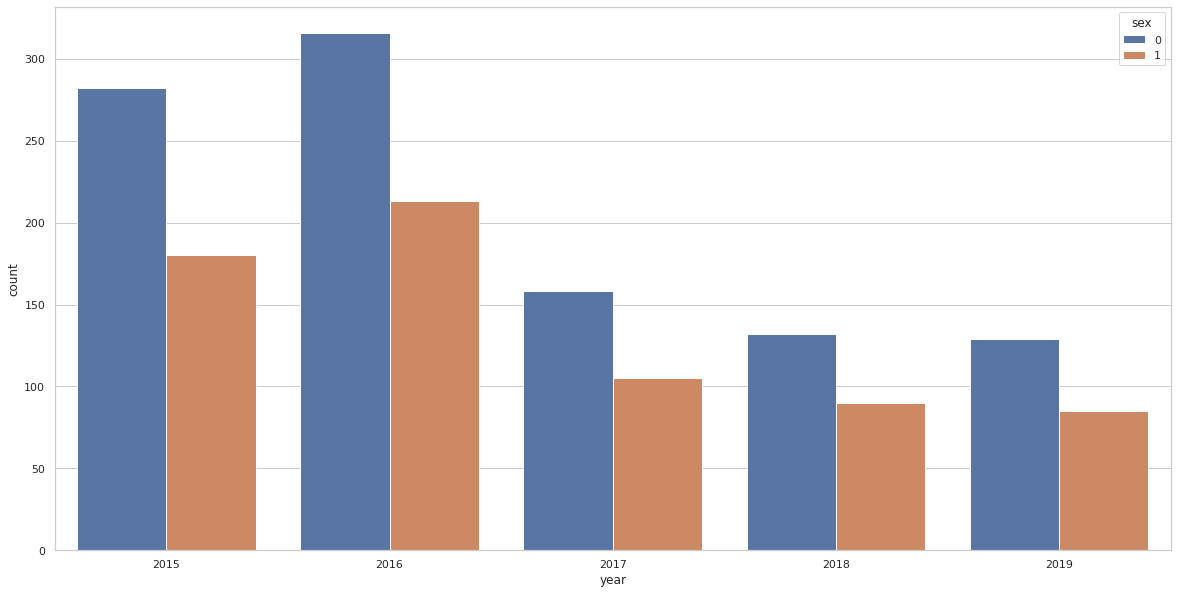

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='year', hue="sex", data=data)

1. **Remove chart border**
2. **Remove gridlines**
You can leave the gridlines but make them thin and use a light color like grey. Do not let them compete visually with your data.
3. ****Remove data markers****
every single element adds cognitive load on the part of your audience
4. ****Clean up axis labels****
remove trailing zeros and abbreviate the months of the year so that they will fit horizontally 
5. ****Label data directly****
leverage the Gestalt principle of proximity and put the data labels right next to the data they describe
6. ****Leverage consistent color****
leveraging the Gestalt principle of similarity, make the data labels the same *color* as the data they describe

<AxesSubplot:xlabel='year', ylabel='count'>

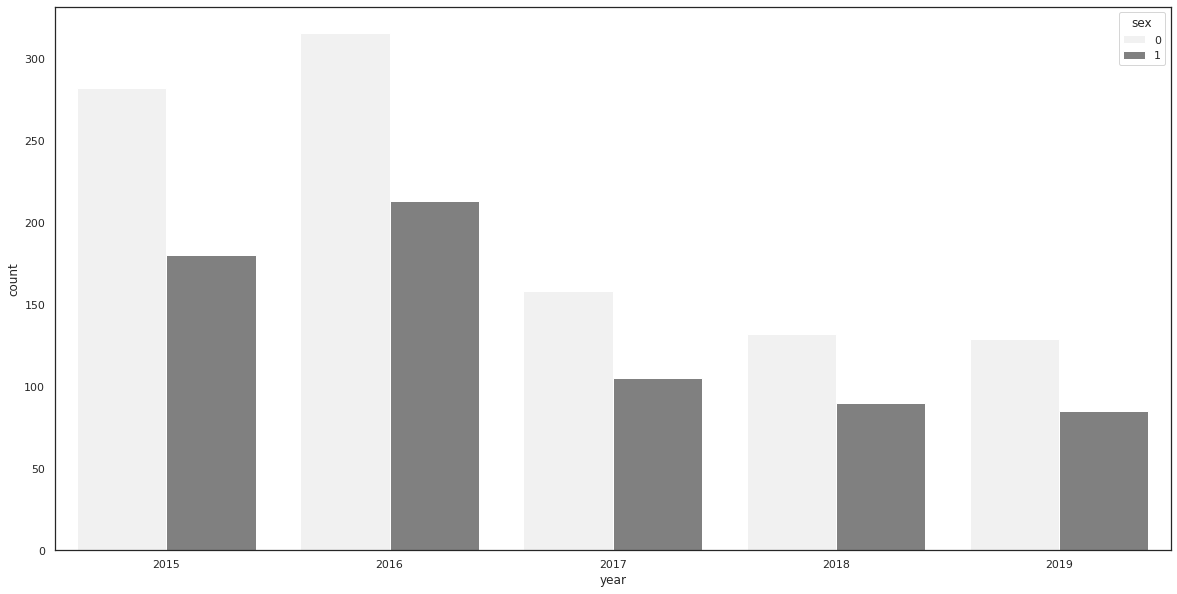

In [ ]:
sns.set_style('white')
sns.countplot(x='year', hue="sex", data=data,color='gray')

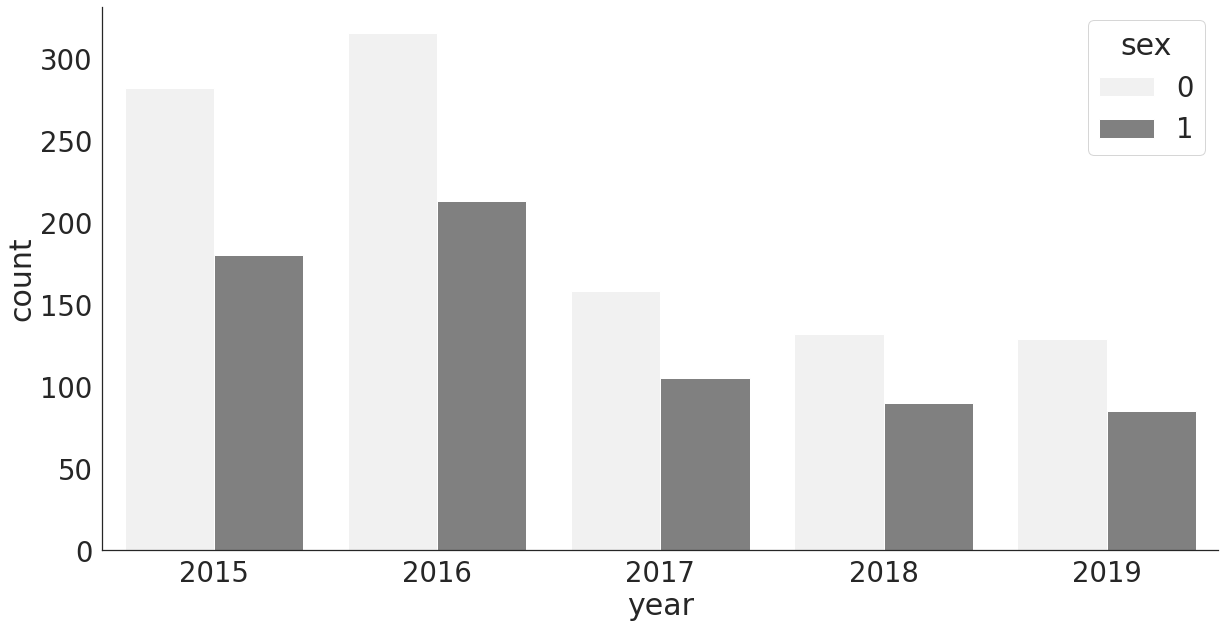

In [ ]:
sns.set_style('white')
sns.countplot(x='year', hue="sex", data=data, color='gray')
sns.despine()

Text(0, 0.5, 'Number of participants')

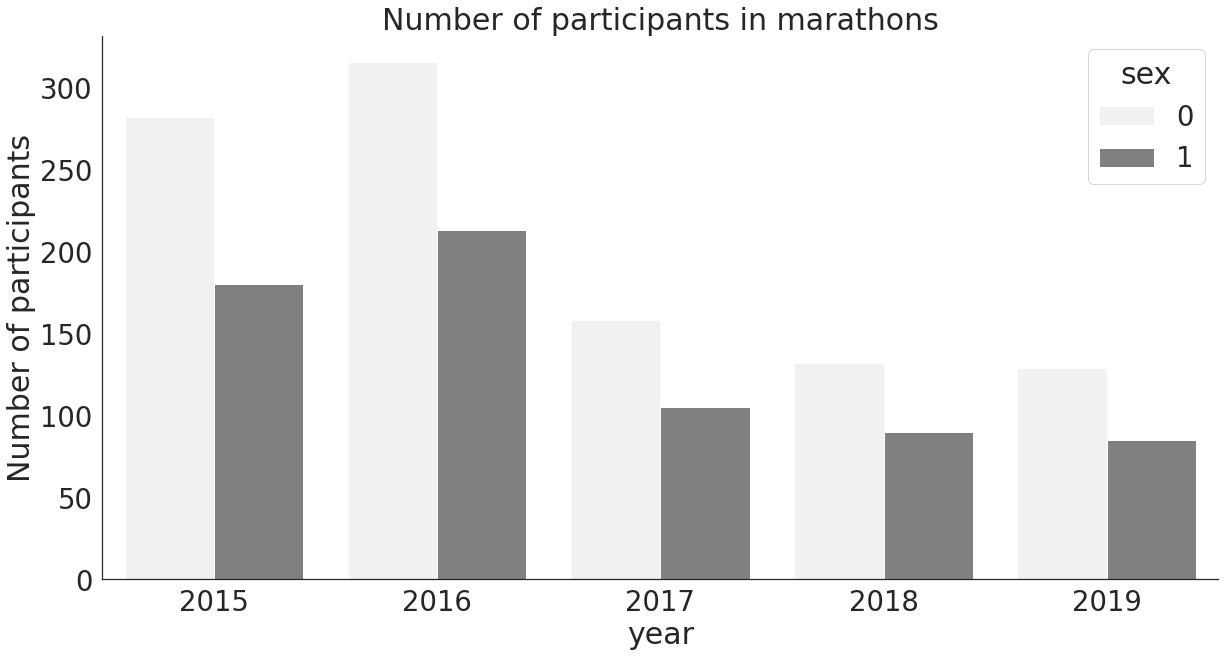

In [ ]:
sns.set_style('white')
num_participants = sns.countplot(x='year', hue="sex", data=data, color='gray')
sns.despine()
sns.set_theme(font_scale=2.5)
num_participants.set_title('Number of participants in marathons')
num_participants.set_ylabel('Number of participants')

## The same examples from BI tool

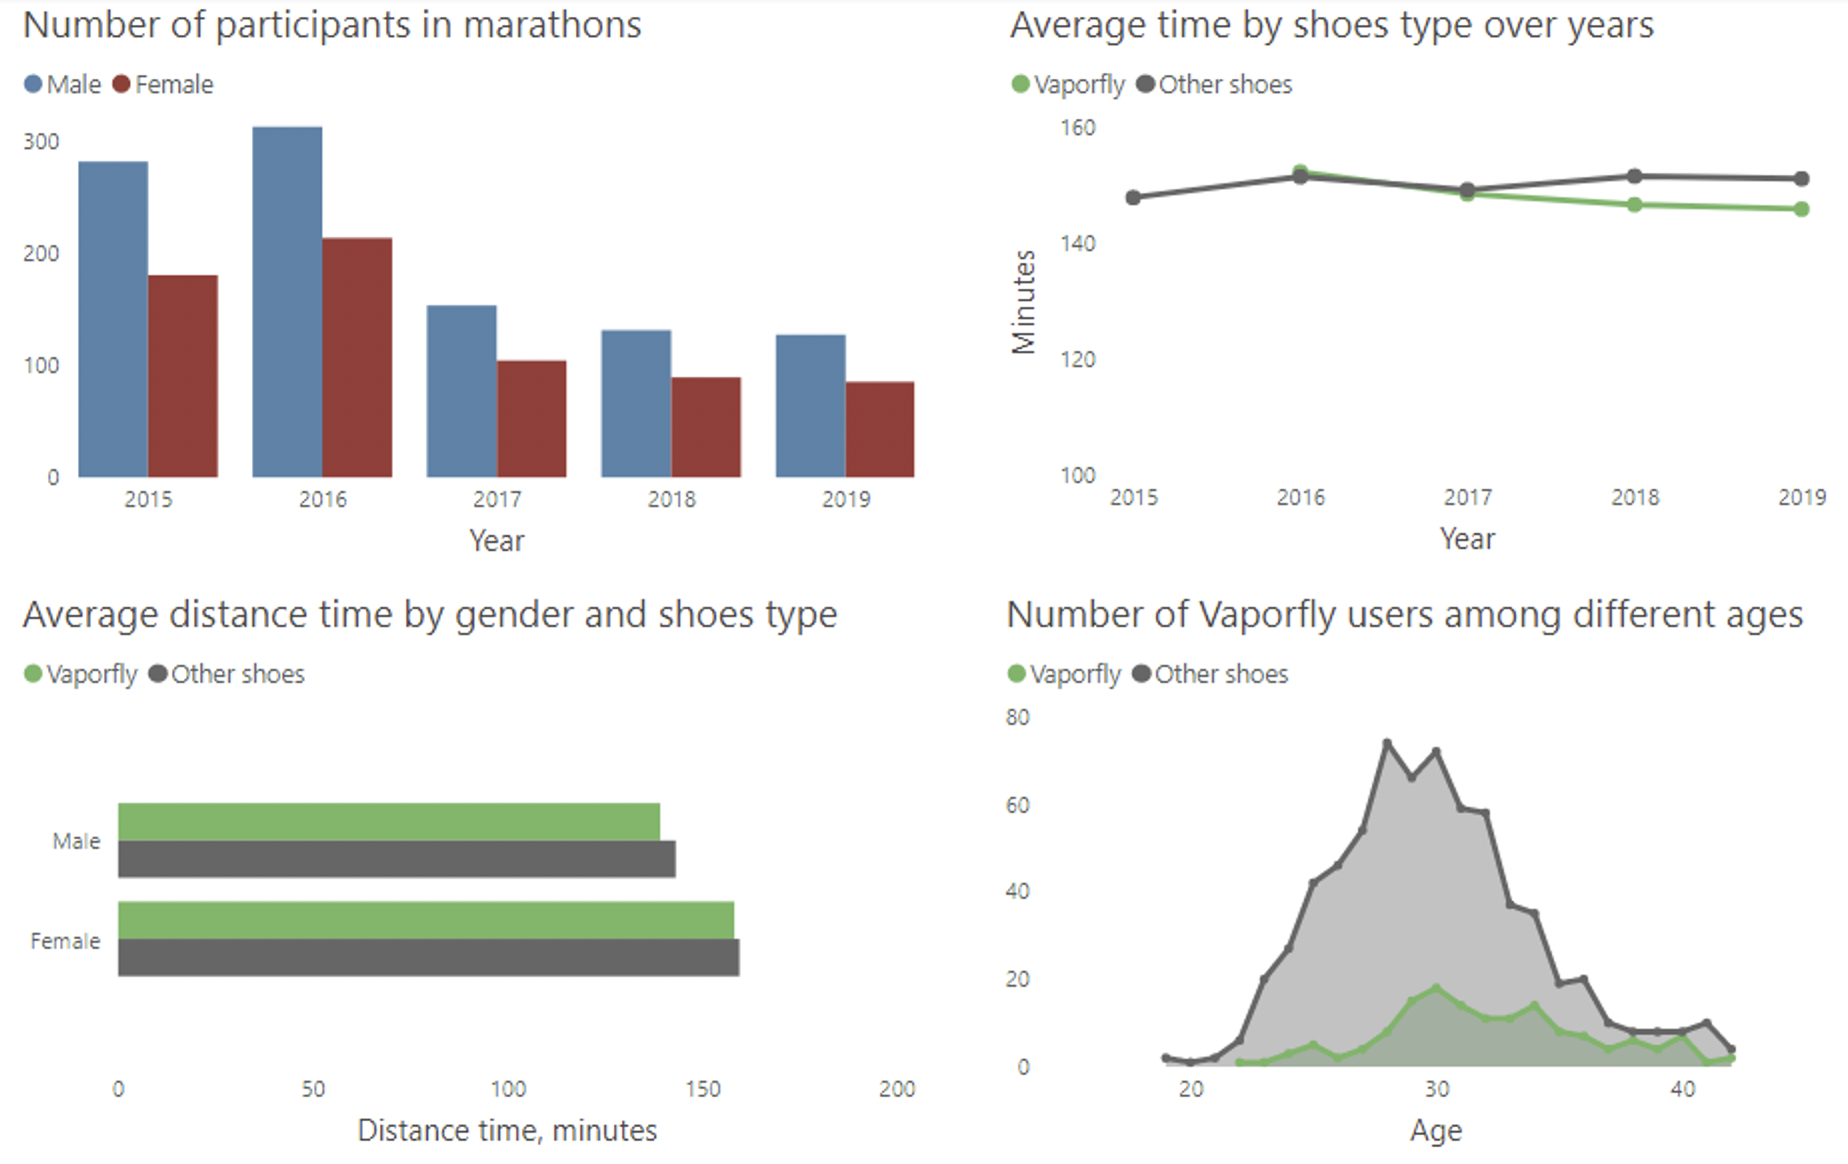

# Non talk / Other experiments

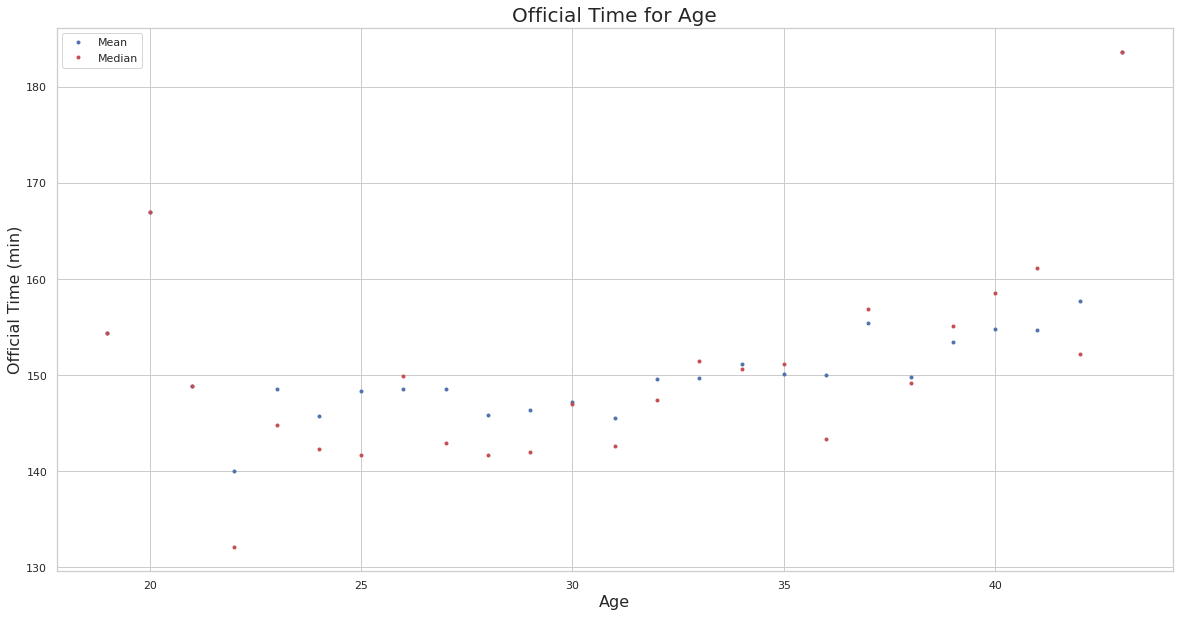

In [ ]:
params_for_tops_by_marathon = data.groupby('marathon')
# Age x Performance
mean_age_time = data.groupby('age').mean().reset_index()
median_age_time = data.groupby('age').median().reset_index()

x = mean_age_time['age']
y = mean_age_time['time_minutes']

plt.pyplot.plot(x, y, '.')

xx = median_age_time['age']
yy = median_age_time['time_minutes']


plt.pyplot.plot(xx, yy, '.', color = 'r')


plt.pyplot.xlabel("Age", fontsize=16)
plt.pyplot.ylabel("Official Time (min)",fontsize=16)
plt.pyplot.title("Official Time for Age",fontsize=20)
plt.pyplot.legend(['Mean', 'Median'])
plt.pyplot.show()

Text(0, 0.5, 'Sex')

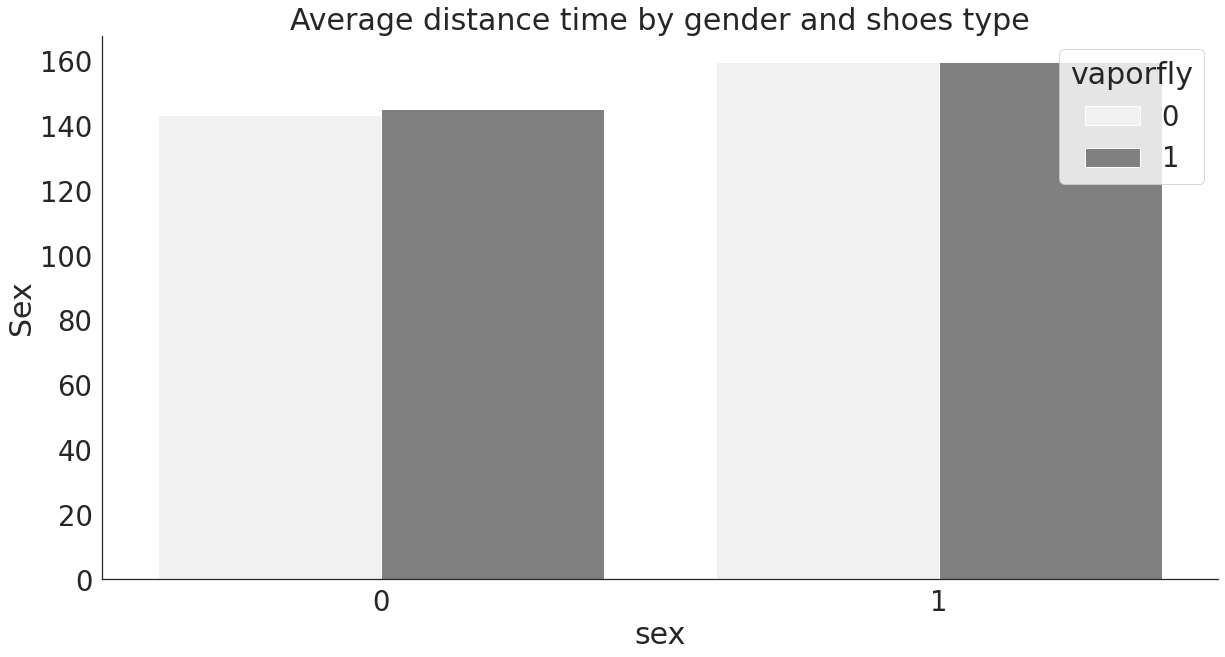

In [ ]:
df = data.groupby(['sex', 'vaporfly']).agg(time_min=('time_minutes','mean')).reset_index()
sns.set_style('white')
avg_time_sex_shoes = sns.barplot(
    x='sex', y='time_min', hue='vaporfly',
    data=df, 
    color='gray')
sns.set_theme(font_scale=2.5)
sns.despine()
avg_time_sex_shoes.set_title('Average distance time by gender and shoes type')
avg_time_sex_shoes.set_ylabel('Sex')
# avg_time_sex_shoes.legend(ncol=2, loc="lower right", frameon=True)

<AxesSubplot:xlabel='time_minutes', ylabel='marathon'>

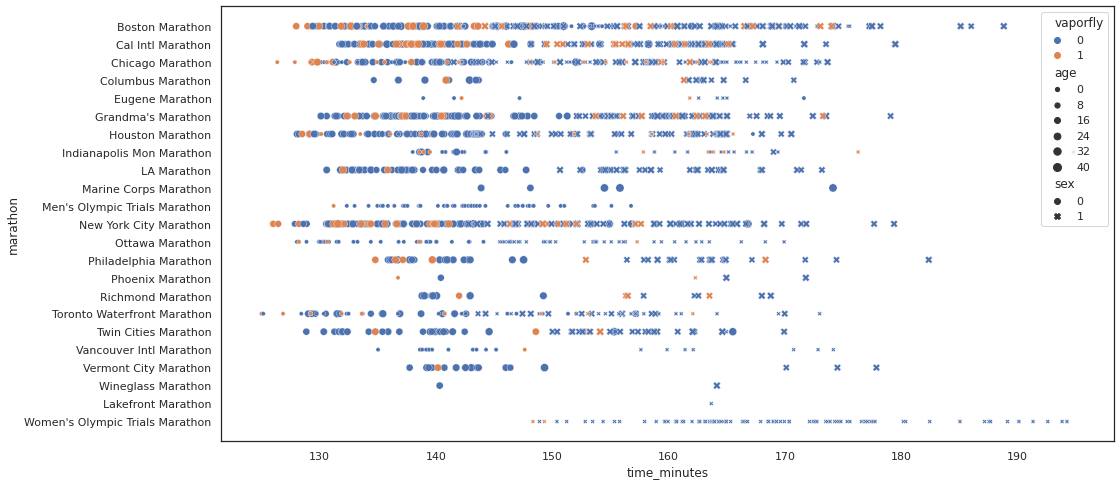

In [ ]:
sns.scatterplot(data=data, 
                x='time_minutes', 
                y='marathon', 
                hue='vaporfly', 
                style='sex', 
                size='age')

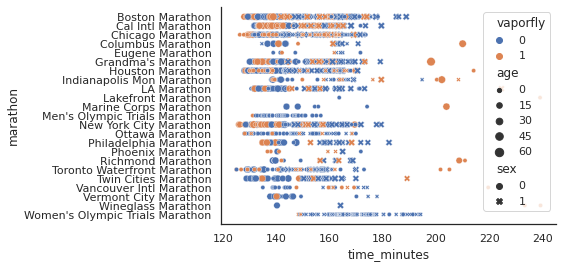

In [ ]:
sns.set_style('white')
# sns.set_theme(font_scale=1)
sns.scatterplot(data=data, 
                x='time_minutes', 
                y='marathon', 
                hue='vaporfly', 
                style='sex', 
                size='age')
sns.despine()


<AxesSubplot:xlabel='age', ylabel='marathon'>

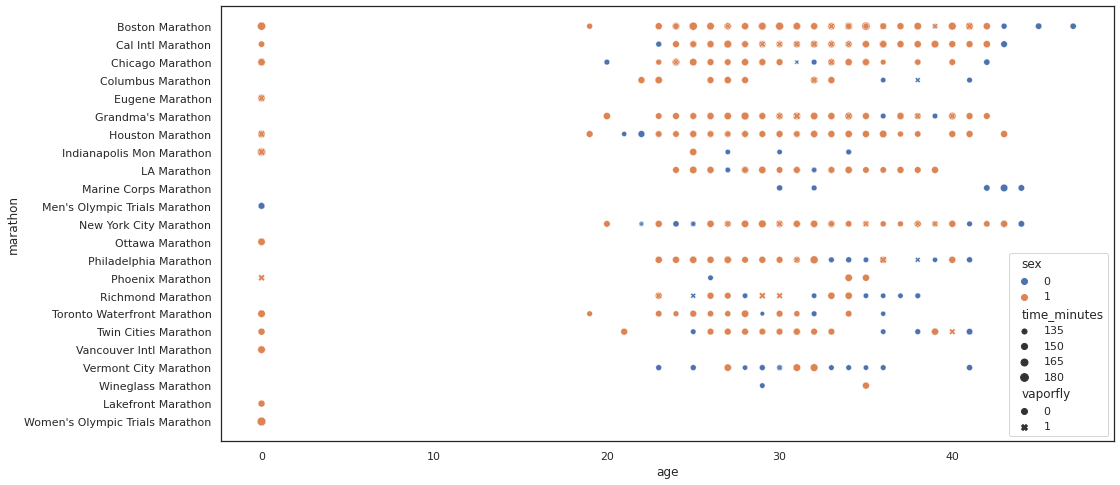

In [ ]:
sns.scatterplot(data=data, 
                x='age', 
                y='marathon', 
                hue='sex', 
                style='vaporfly', 
                size='time_minutes')

In [ ]:
%%capture
! pip install hvplot

In [ ]:
import hvplot.pandas

hvplot.extension('matplotlib')
pd.options.plotting.backend = 'holoviews'

In [ ]:
# data.hvplot.scatter(x='age', y='marathon', by='vaporfly',
#                     legend='top', 
#                     height=600, width=900)


:Bars   [sex,vaporfly]   (time_min)
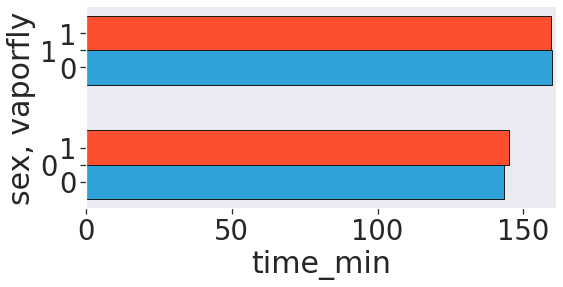

In [ ]:
df.hvplot.barh('sex', 'time_min', by='vaporfly')

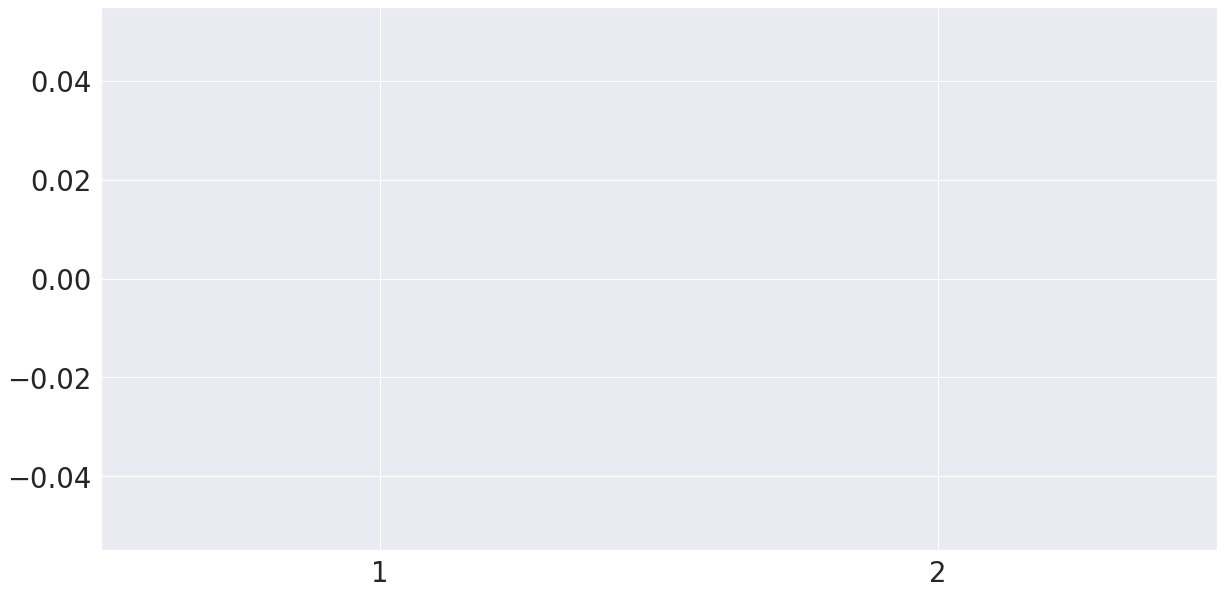

In [ ]:
# Analyzing the finishing times according to the gender.
with sns.axes_style('darkgrid'):
    plt.pyplot.boxplot([data[data['sex']=='0']['time_minutes'],data[data['sex']=='1']['time_minutes']])


In [ ]:
groupe_by_gender=data[['sex','time_minutes']].groupby('sex',group_keys=True).apply(lambda x:x)
groupe_by_gender

sex  time_minutes
0       0    129.283333
1       0    129.800000
2       0    130.366667
3       0    130.783333
4       0    130.816667
...   ...           ...
1580    1    162.066667
1581    1    154.116667
1582    1    155.833333
1583    1    158.766667
1599    1    164.150000

[840 rows x 2 columns]

In [ ]:
avg_time_by_shoes_df

vaporfly  year    time_min
0         0  2015  148.117497
1         0  2016  147.410439
2         0  2017  149.286207
3         0  2018  151.350889
4         0  2019  149.478947
5         1  2016  210.000000
6         1  2017  152.357018
7         1  2018  146.802160
8         1  2019  145.280172

Text(0, 0.5, 'Minutes')

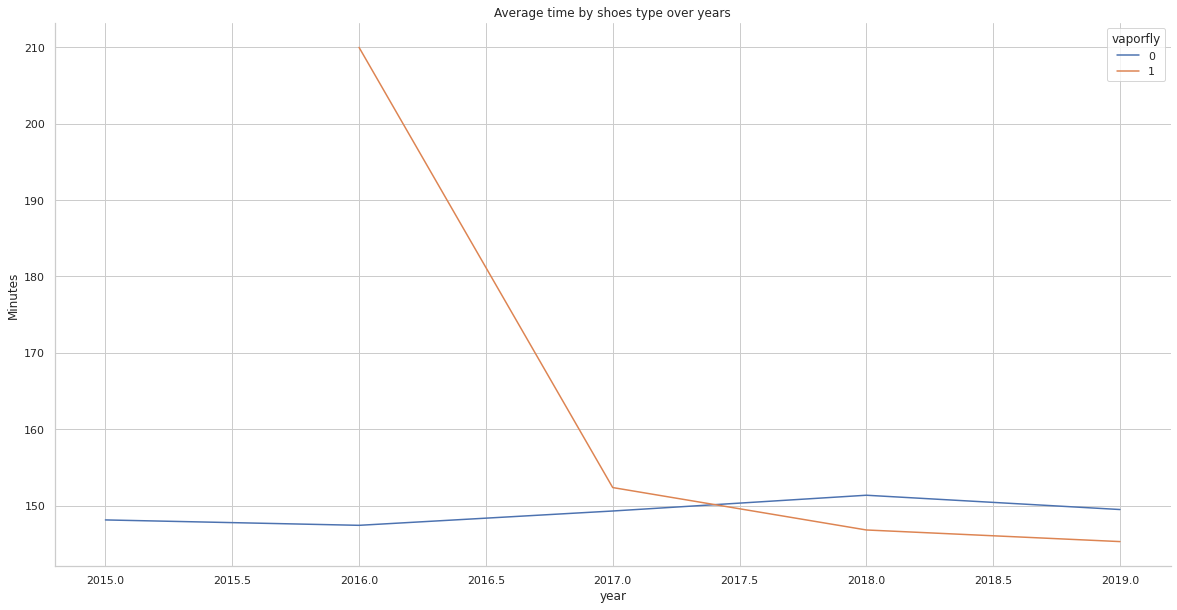

In [ ]:
sns.set_style('whitegrid')
avg_time_by_shoes_df = data.groupby(['vaporfly', 'year']).agg(time_min=('time_minutes','mean')).reset_index()

avg_time_by_shoes = sns.lineplot(
    x='year', 
    y='time_min', 
    hue="vaporfly",
    data=avg_time_by_shoes_df)
sns.despine()
# sns.set_theme(font_scale=2.5)
avg_time_by_shoes.set_title('Average time by shoes type over years')
avg_time_by_shoes.set_ylabel('Minutes')

In [ ]:
# Number of Vaporfly users amoung different ages


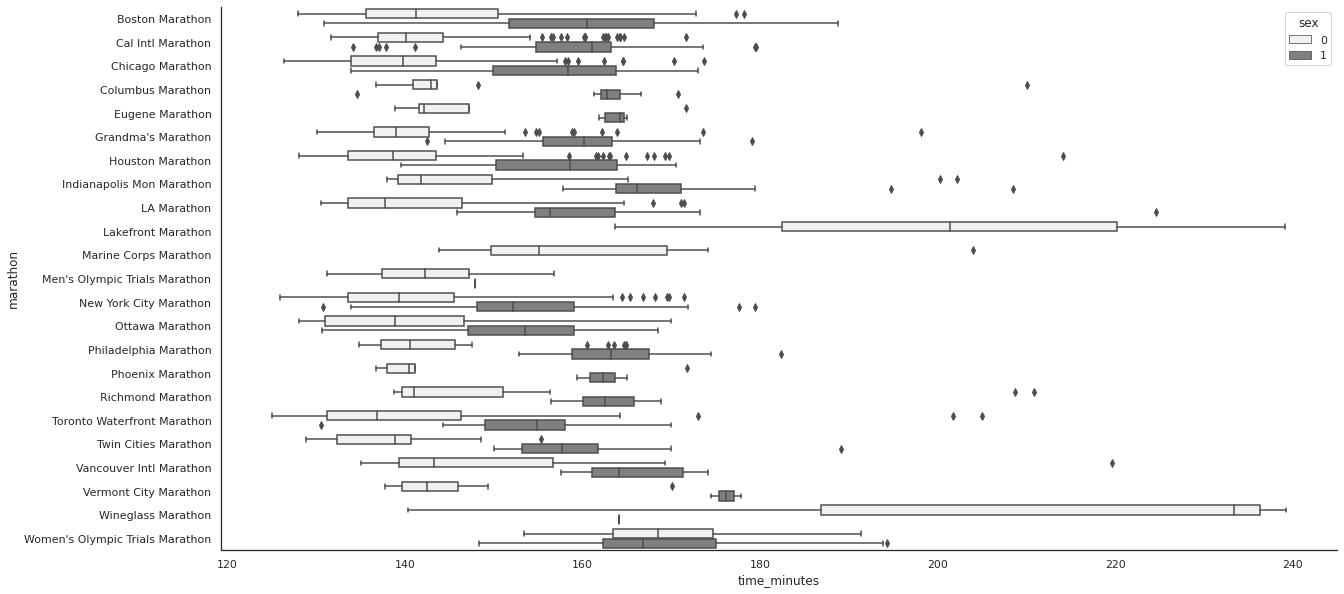

In [ ]:
# %matplotlib notebook
%matplotlib inline
sns.set(rc = {'figure.figsize':(20,10)})
sns.set_style('white')

sns.boxplot(x="time_minutes", y="marathon", 
            hue='sex', data=data,
            color='gray')
sns.despine()


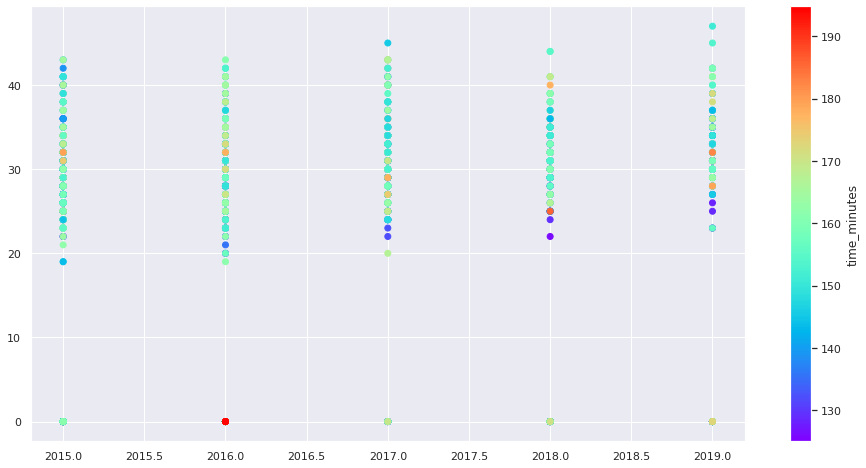

In [ ]:
fig = plt.pyplot.figure()
scat = plt.pyplot.scatter(data['year'], data['age'],
                          c=data['time_minutes'], 
                          cmap=plt.cm.rainbow)
fig.colorbar(scat, label='time_minutes')
plt.pyplot.show()

<AxesSubplot:xlabel='time_minutes', ylabel='marathon'>

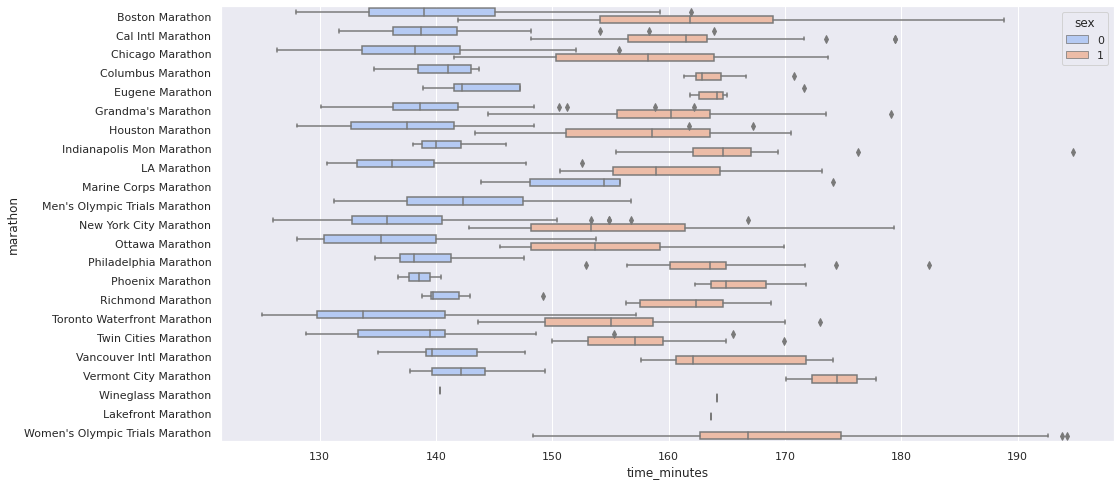

In [ ]:
sns.boxplot(x="time_minutes", y="marathon", 
            hue='sex', data=data,
            palette='coolwarm')

<AxesSubplot:xlabel='time_minutes', ylabel='marathon'>

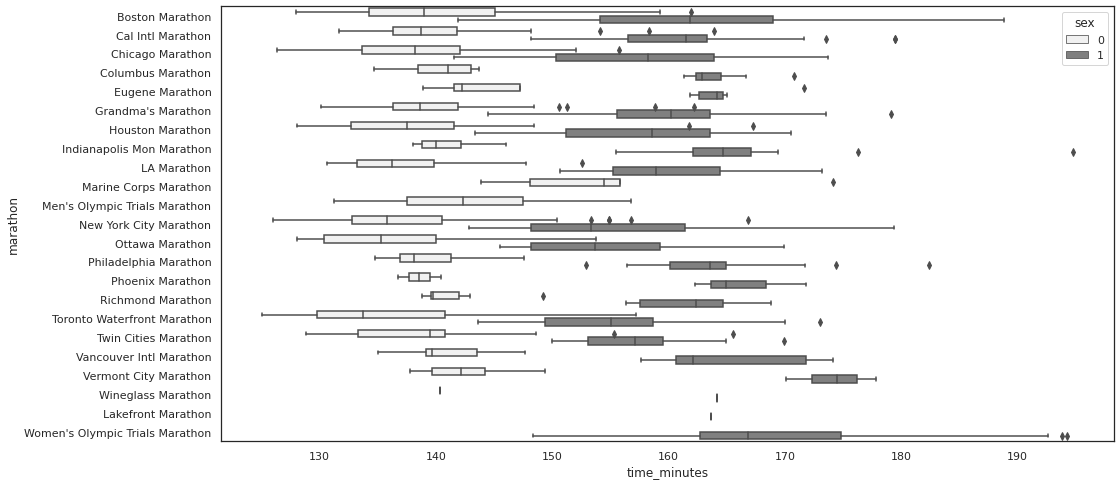

In [ ]:
sns.set(style="white")
sns.boxplot(x="time_minutes", y="marathon", 
            hue='sex', data=data,
            color='gray'
            )

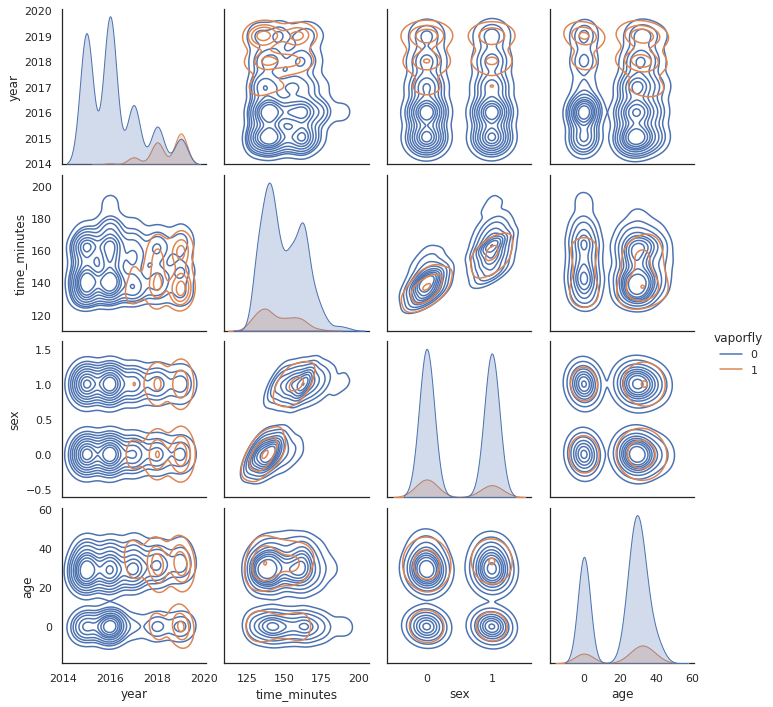

In [ ]:
sns.pairplot(data, kind="kde", hue="vaporfly")

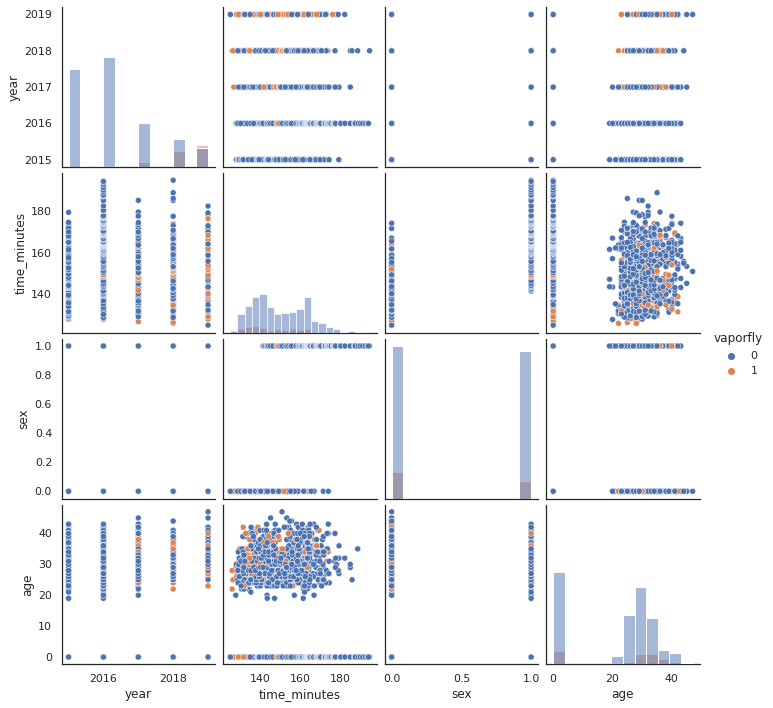

In [ ]:
sns.pairplot(data, diag_kind="hist", hue="vaporfly")

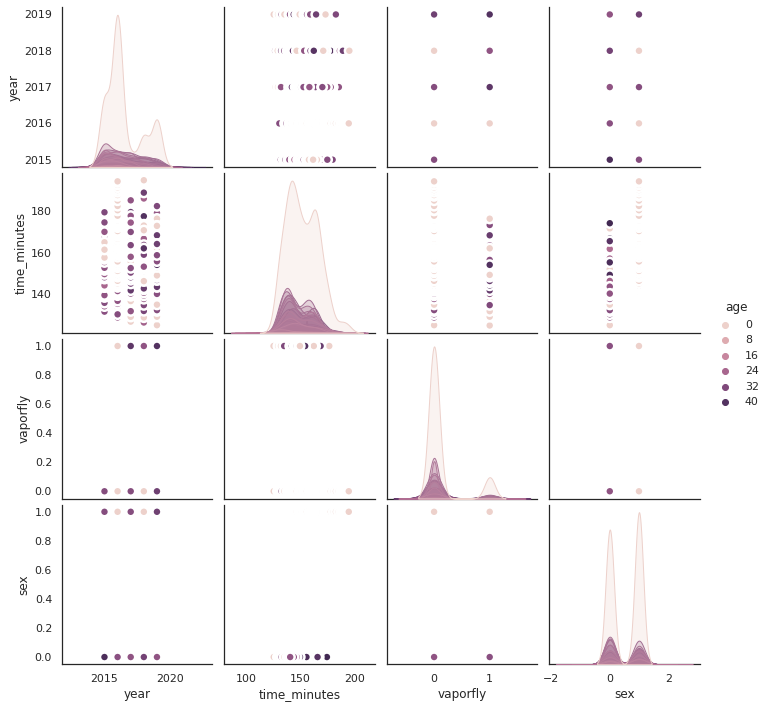

In [ ]:
sns.pairplot(data, kind="scatter", hue="age", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))

In [ ]:
# sns.scatterplot(data=data, 
#                 x='time_minutes', 
#                 y='marathon', 
#                 hue='sex', 
#                 size='age', 
#                 style='vaporfly')

<AxesSubplot:xlabel='age', ylabel='marathon'>

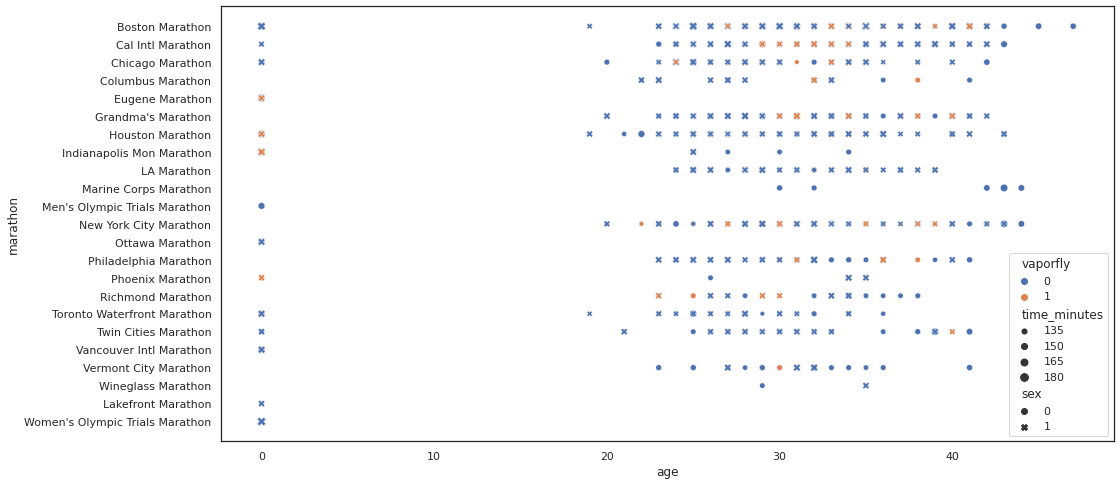

In [ ]:
sns.scatterplot(data=data, 
                x='age', 
                y='marathon', 
                hue='vaporfly', 
                style='sex', 
                size='time_minutes')

In [ ]:
# One chart - one story
# easy -> hard -> One chart - one story

<AxesSubplot:xlabel='time_minutes', ylabel='match_name'>

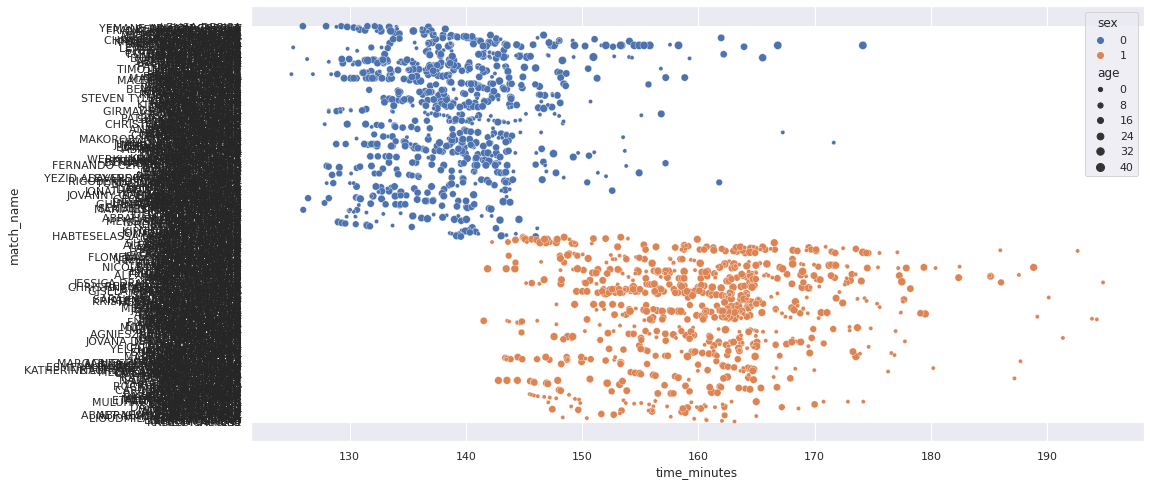

In [ ]:
# sns.factorplot
sns.scatterplot(data=data, 
                x='time_minutes', 
                y='match_name', 
                hue='sex', 
                size='age')

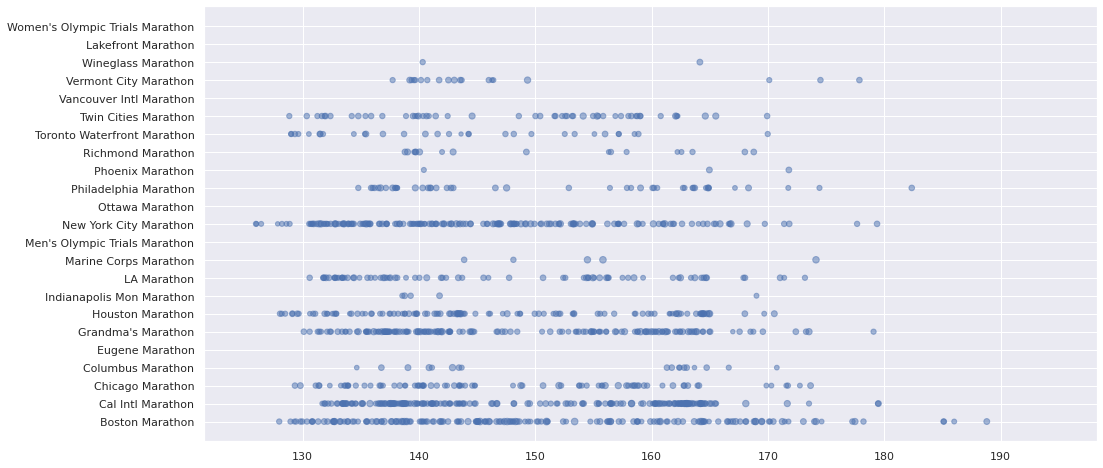

In [ ]:
# x : The data position on the x axis
# y : The data position on the y axis
# s : The marker size
# alpha : Transparancy ratio

plt.pyplot.scatter(data.time_minutes, data.marathon, s=data.age, alpha=0.5)

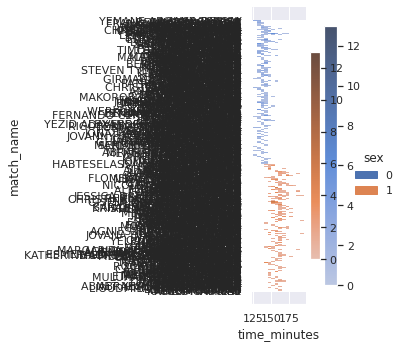

In [ ]:
sns.displot(data, x="time_minutes", y="match_name", hue='sex', binwidth=(5, .5), cbar=True)

/home/ya/GridDynamics/DataVisualisation/env/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret value `marathon` for parameter `y`

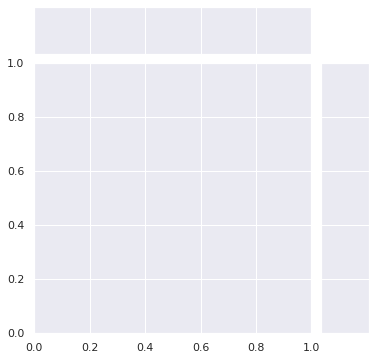

In [ ]:
sns.jointplot(data, x="time_minutes", y="marathon")

ValueError: Could not interpret value `bill_length_mm` for parameter `x`

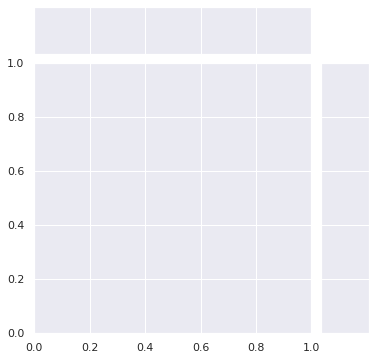

In [ ]:
g = sns.jointplot(data=data, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

<AxesSubplot:xlabel='time_minutes', ylabel='marathon'>

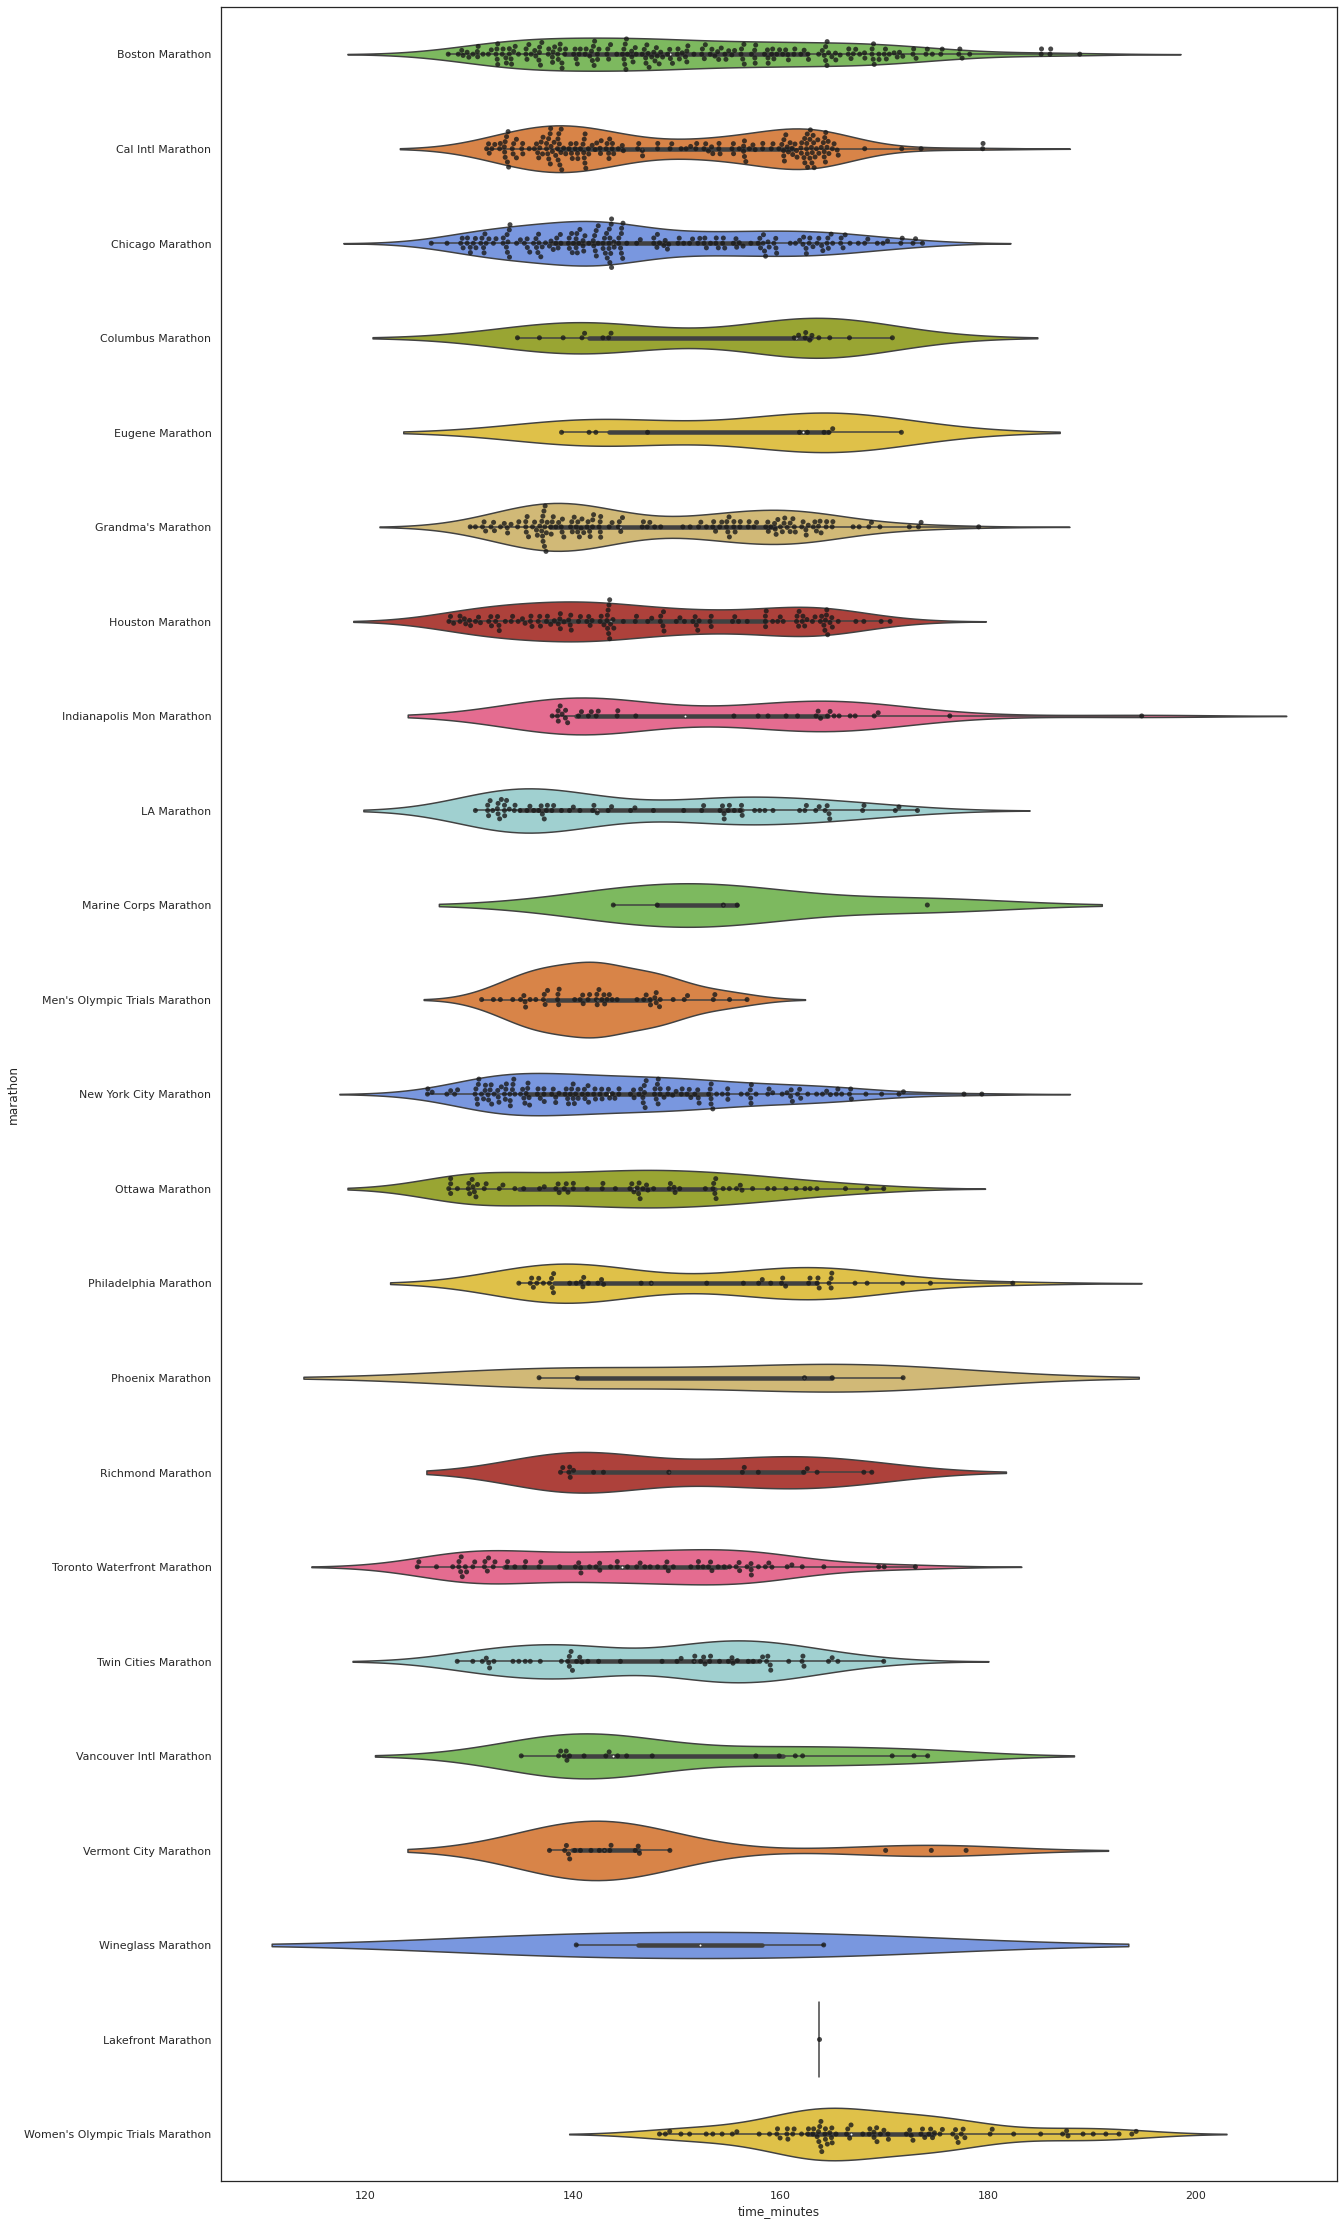

In [ ]:
colors_list = ['#78C850', '#F08030',  '#6890F0',  '#A8B820',  '#F8D030', '#E0C068', '#C03028', '#F85888', '#98D8D8']

plt.pyplot.figure(figsize=(20,40))
sns.violinplot(data=data, x='time_minutes', y='marathon',palette=colors_list)
sns.swarmplot(data=data, x='time_minutes', y='marathon', color="k", alpha=0.8)


ValueError: could not convert string to float: 'Boston Marathon'

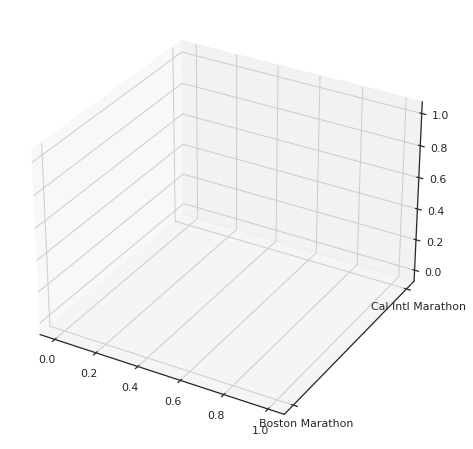

In [ ]:
fig = plt.pyplot.figure()
ax = fig.add_subplot(111, projection = '3d')

x = data['time_minutes']
y = data['marathon']
z = data['vaporfly']
ax.scatter(x, y, z)
# plt.pyplot.show()

In [ ]:
# grid = sns.FacetGrid(data, col = "time_minutes", hue = "time_minutes", col_wrap=5)
# grid.map(sns.scatterplot, "age", "vaporfly")

## Interactive

In [ ]:
%%capture
! pip install hvplot

In [ ]:
pd.options.plotting.backend = 'holoviews'

In [ ]:
data.plot(kind='line', x='year', y='time_minutes', 
           color='orange', grid=False, hover_cols='vaporfly',
           title='test')

# Creating Selector (widget) containing all posible Pokémon types
pok_types = list(df.type_1.unique())
pok_type = pn.widgets.Select(name='Type', options=pok_types)

# Create interactive dataframe
idf = df.interacive()

# Create interaction with data
data_pipeline = (
    idf[
        (idf.type_1 == pok_type) |  (idf.type_2 == pok_type)
    ]
)

# Select data containing avg weakness and rename value results as damage
data_damage = data_pipeline.iloc[:, -18:].mean().rename('Damage')

# Create Bar Plot
data_damage.hvplot(kind='bar',
               title='This type is Weak against...', 
               rot=45, 
               c='Damage', colorbar=True, 
               colormap='RdYlGn_r', 
               shared_axes=False,)

:Curve   [year]   (time_minutes,vaporfly)

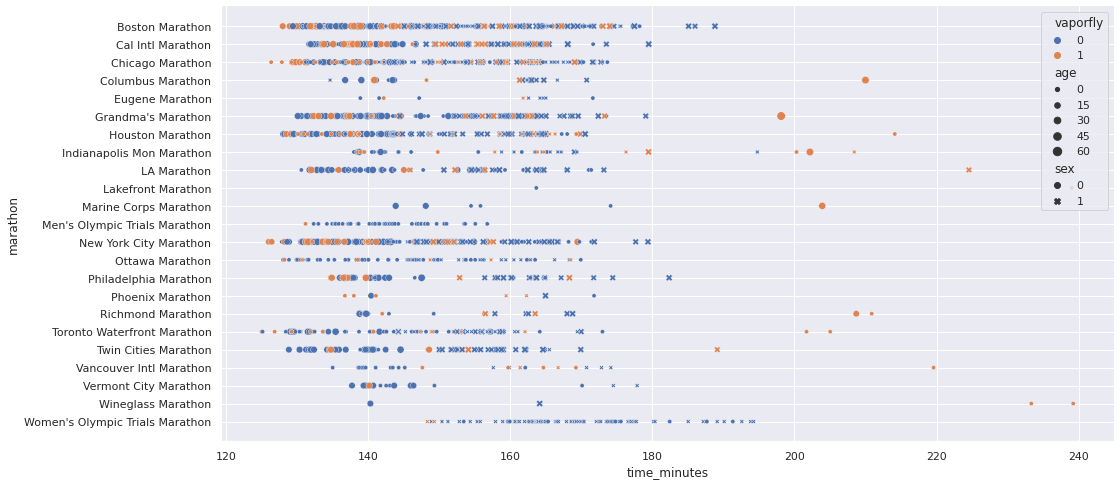

In [ ]:
sns.set(style="white")
sns.set_theme(font_scale=1)
sns.scatterplot(data=data, 
                x='time_minutes', 
                y='marathon', 
                hue='vaporfly', 
                style='sex', 
                size='age')
sns.despine()
